In [88]:
import os
import requests
import tarfile

In [89]:
def download_and_extract(url, target_folder):
    response = requests.get(url)
    tar_file = '20news-bydate.tar.gz'

    if response.status_code == 200:
        # Save the content to a local file
        local_filename = os.path.join(target_folder, tar_file)
        with open(local_filename, 'wb') as f:
            f.write(response.content)
        
        # Extract the tar.gz file
        with tarfile.open(local_filename, 'r:gz') as tar:
            tar.extractall(target_folder)

        os.remove(target_folder + tar_file)
        
        print(f"File downloaded and extracted to {target_folder}")
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")


In [90]:
import os

def calculate_average_length(root_folder):
    text_lengths = []

    for foldername, _, filenames in os.walk(root_folder):
        for filename in filenames:
            filepath = os.path.join(foldername, filename)
            with open(filepath, encoding="Latin-1") as file:
                content = file.read()
                text_lengths.append(len(content))

    average_length = sum(text_lengths)/len(text_lengths)
    return average_length, text_lengths


In [91]:
root_folder = '20newsgroup/'

if not os.path.exists(root_folder):
    os.makedirs(root_folder)

# Download and extract the tar.gz file
download_url = 'http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz'
download_and_extract(download_url, root_folder)

# Calculate average length
average_length, text_lengths = calculate_average_length(root_folder)

print(f'Average Length of Contents: {average_length}')

File downloaded and extracted to 20newsgroup/
Average Length of Contents: 1902.5183593335455


In [92]:
import pandas as pd

text_lengths_df = pd.Series(text_lengths)
text_lengths_df.describe()

count     18846.000000
mean       1902.518359
std        3984.970058
min         115.000000
25%         751.000000
50%        1175.000000
75%        1874.750000
max      160616.000000
dtype: float64

In [93]:
os.listdir(root_folder)

['20news-bydate-test', '20news-bydate-train']

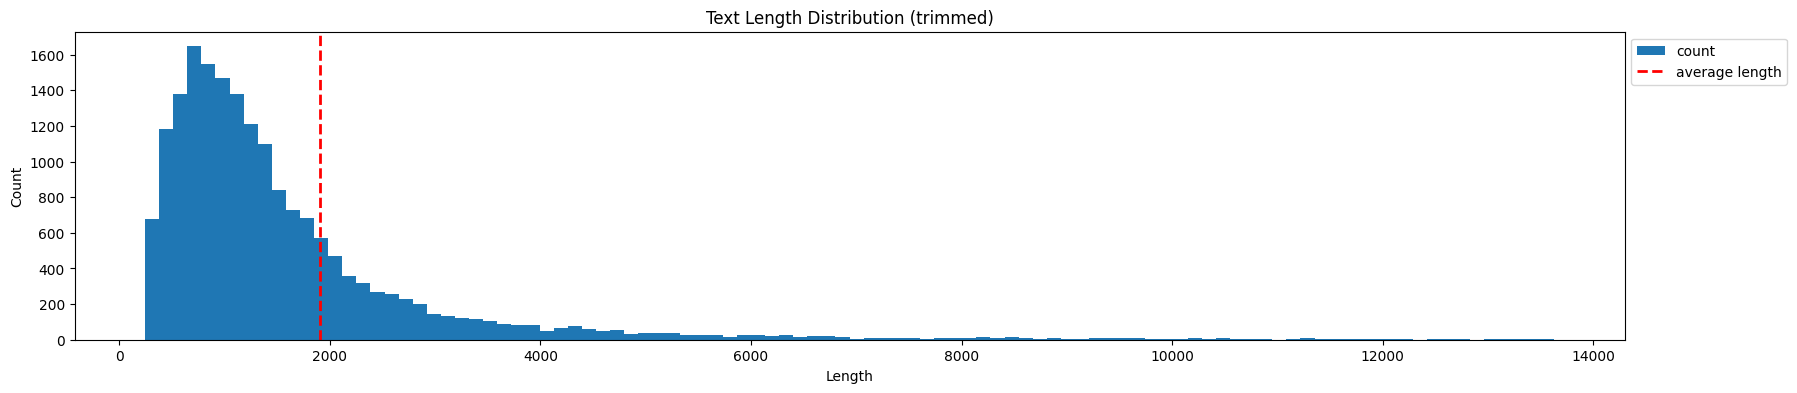

In [84]:
import matplotlib.pyplot as plt

quantile_1 = text_lengths_df.quantile(0.01)
quantile_99 = text_lengths_df.quantile(0.99)
index = text_lengths_df[(text_lengths_df >= quantile_99)|(text_lengths_df <= quantile_1)].index

text_lengths_cleaned = text_lengths_df.drop(index, inplace=False)

plt.figure(figsize=(20, 4))
plt.hist(text_lengths_cleaned, bins=100, label="count")
plt.axvline(x=average_length, color='red', ls='--', lw=2, label='average length')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Text Length Distribution (trimmed)')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

In [1]:
import shutil
shutil.rmtree(root_folder)

NameError: name 'root_folder' is not defined